In [1]:
library (ggplot2)
library (tidyverse)
library(tidymodels)
library(dplyr)
set.seed (42)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ 

In [2]:
hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


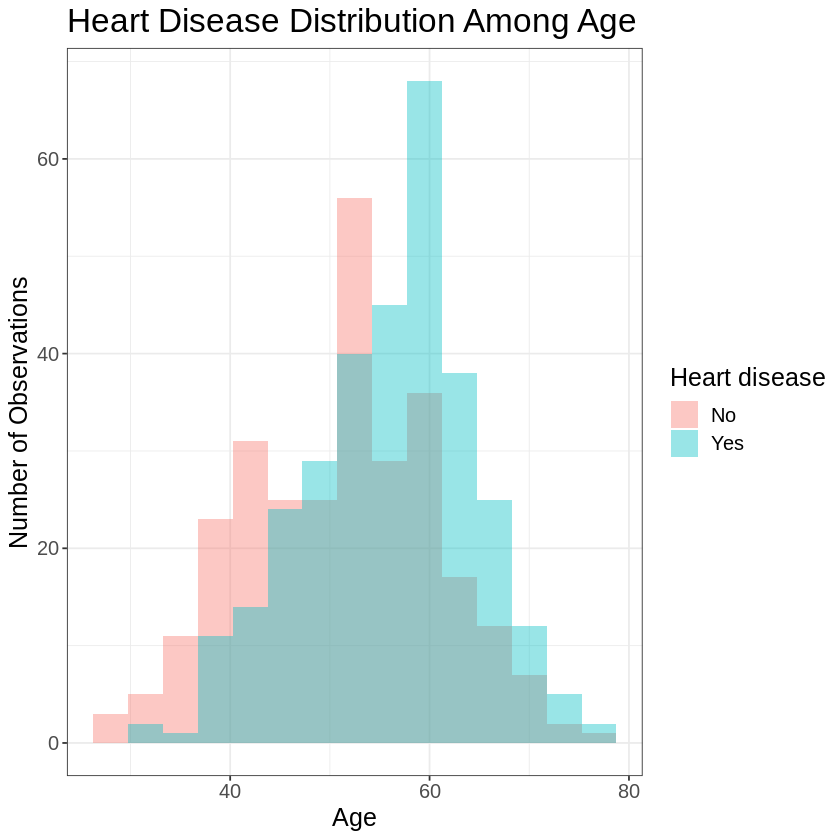

In [3]:
#clean and summarize data by selecting 5 out of 14 variables 
#summarize the values for num to a binary variable -> now we only distinguish whether a person has a heart disease or not 
#change col_types
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num') 
heart_data_cleaned <- subset (heart_data_cleaned, fbs != "?")
heart_data_cleaned <- subset (heart_data_cleaned, chol != "?")
heart_data_cleaned$num [heart_data_cleaned$num == "2"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "3"] <- "1"
heart_data_cleaned$num [heart_data_cleaned$num == "4"] <- "1"
heart_data_cleaned <- mutate (heart_data_cleaned, trestbps = as.numeric (trestbps))
heart_data_cleaned <- mutate (heart_data_cleaned, chol = as.numeric (chol))
heart_data_cleaned <- mutate (heart_data_cleaned, fbs = as_factor (fbs))
heart_data_cleaned <- mutate (heart_data_cleaned, num = as_factor(num))
heart_data_cleaned <- mutate (heart_data_cleaned, sex = as_factor(sex))

#split data into training and testing data
heart_data_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = num)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)



#training data und only use training data for plotting
#add description 
#seet seed

age_distribution <- ggplot (heart_data_train, aes (x= age, fill = num))+
  geom_histogram (position = "identity", alpha = 0.4, bins =15)+
  theme_bw ()+
  xlab ("Age") +
  ylab ("Number of Observations")+
    labs (fill ="Heart disease")+
    scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Heart Disease Distribution Among Age")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
age_distribution 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


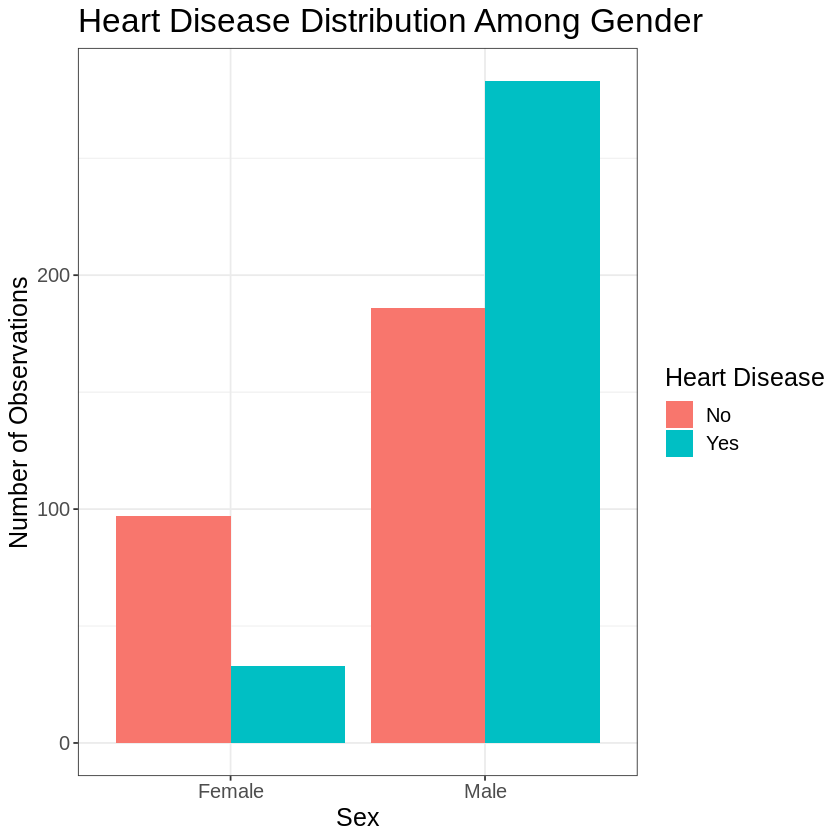

In [4]:
sex_distribution <- ggplot (heart_data_train, aes (x= as_factor(sex), fill = num ))+
  geom_histogram (position = "dodge", stat ="count")+
  theme_bw () +
  xlab ("Sex") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "Female", "1" = "Male"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Heart Disease Distribution Among Gender")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
sex_distribution 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


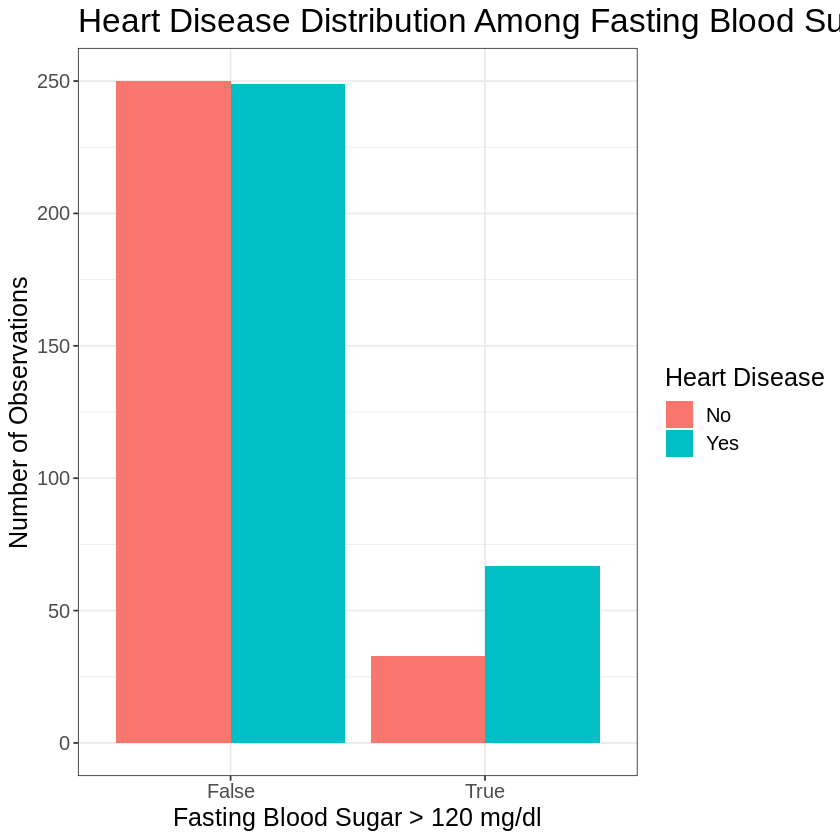

In [5]:
fbs_distribution <- ggplot (heart_data_train, aes (x= fbs, fill = num ))+
  geom_histogram (position = "dodge", stat = "count")+
  theme_bw () +
  xlab ("Fasting Blood Sugar > 120 mg/dl") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "False", "1" = "True"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Heart Disease Distribution Among Fasting Blood Sugar Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
fbs_distribution 

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


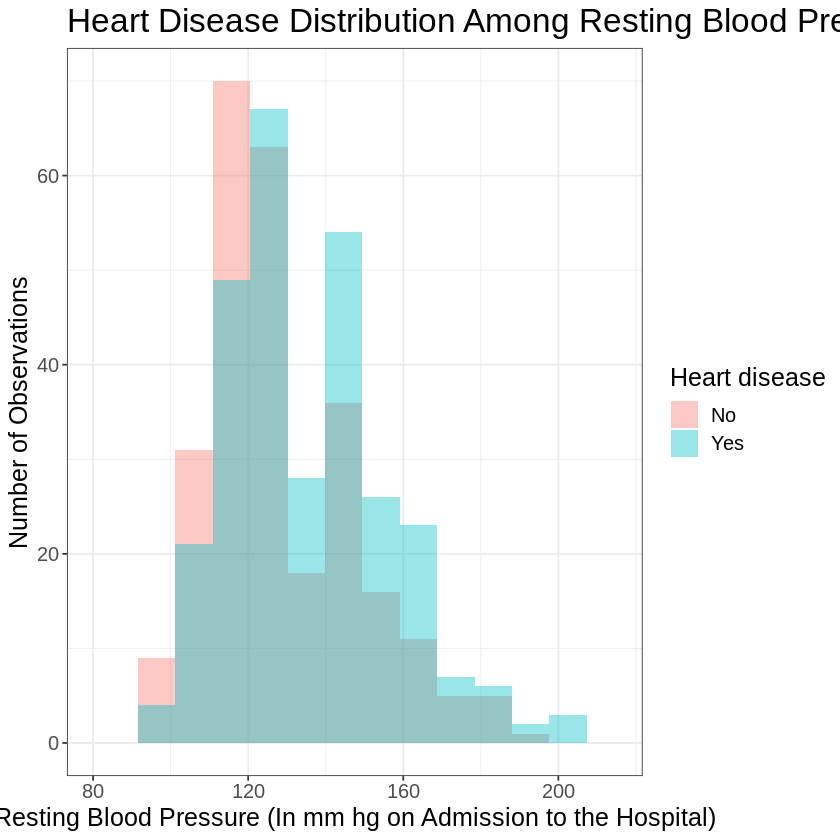

In [6]:
trestbps_distribution <- ggplot (heart_data_train, aes (x= trestbps, fill = num))+
  geom_histogram (alpha = 0.4, bins = 15, position = "identity")+
  theme_bw ()+
  xlab ("Resting Blood Pressure (In mm hg on Admission to the Hospital)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
xlim (80, 215)+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Heart Disease Distribution Among Resting Blood Pressure Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
trestbps_distribution 

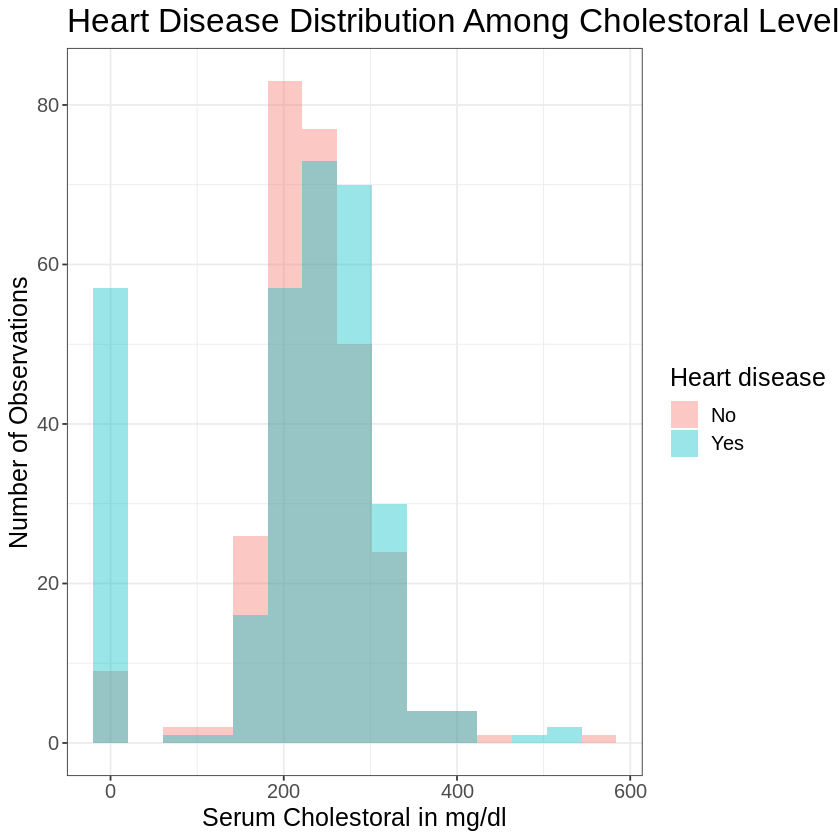

In [7]:
library (tidymodels)
chol_distribution <- ggplot (heart_data_train, aes (x= chol, fill = num))+
  geom_histogram (position = "identity", bins = 15, alpha = 0.4)+
  theme_bw ()+
  xlab ("Serum Cholestoral in mg/dl") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete(labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Heart Disease Distribution Among Cholestoral Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =15))
chol_distribution 

In [8]:
head(heart_data_cleaned)

age,sex,trestbps,chol,fbs,num
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
28,1,130,132,0,0
29,1,120,243,0,0
30,0,170,237,0,0
31,0,100,219,0,0
32,0,105,198,0,0
32,1,110,225,0,0
